<a href="https://colab.research.google.com/github/ThiagoSViana/Projects/blob/main/FreeCode_PageView.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading data from file
df = pd.read_csv("/content/drive/MyDrive/fcc-forum-pageviews.csv")

In [ ]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [ ]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index('date')

In [ ]:
#Clean data
#Following the orders
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

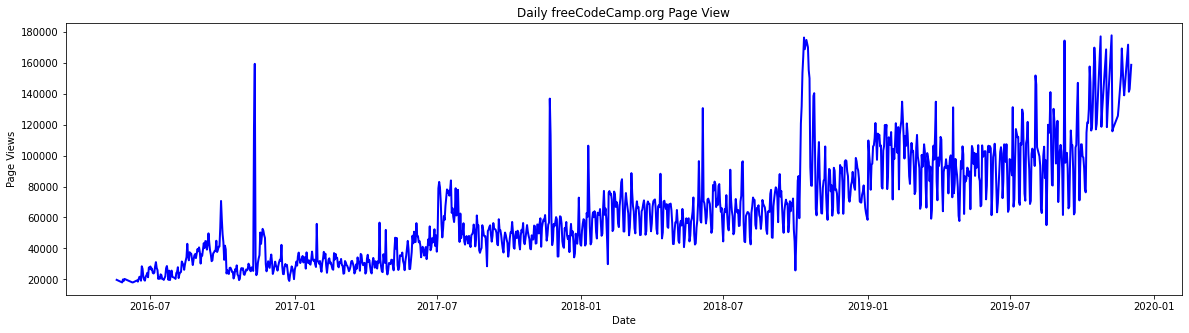

In [ ]:
#Draw line plot

fig, ax = plt.subplots(figsize = (20,5))
ax.plot(df.index, df['value'], color='blue', linewidth=2)
ax.set_title("Daily freeCodeCamp.org Page View")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

plt.show()

In [ ]:
# First: Copy and modify data for monthly bar plot
df_barplot = df.copy()
df["month"] = df.index.month
df["year"] = df.index.year
df_barplot = df.groupby(["year", "month"])["value"].mean()
df_barplot = df_barplot.unstack()

#When more than one column header is present we can stack the specific column header by specified the level. \
#unstack() function in pandas converts the data into unstacked format. Let’s see with an example.

In [ ]:
df_barplot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,11242.695652,19124.366667,23314.225806,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,112592.000000,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,162402.600000,100804.451613,117991.032258,97268.833333,150862.709677,181026.700000,173870.333333


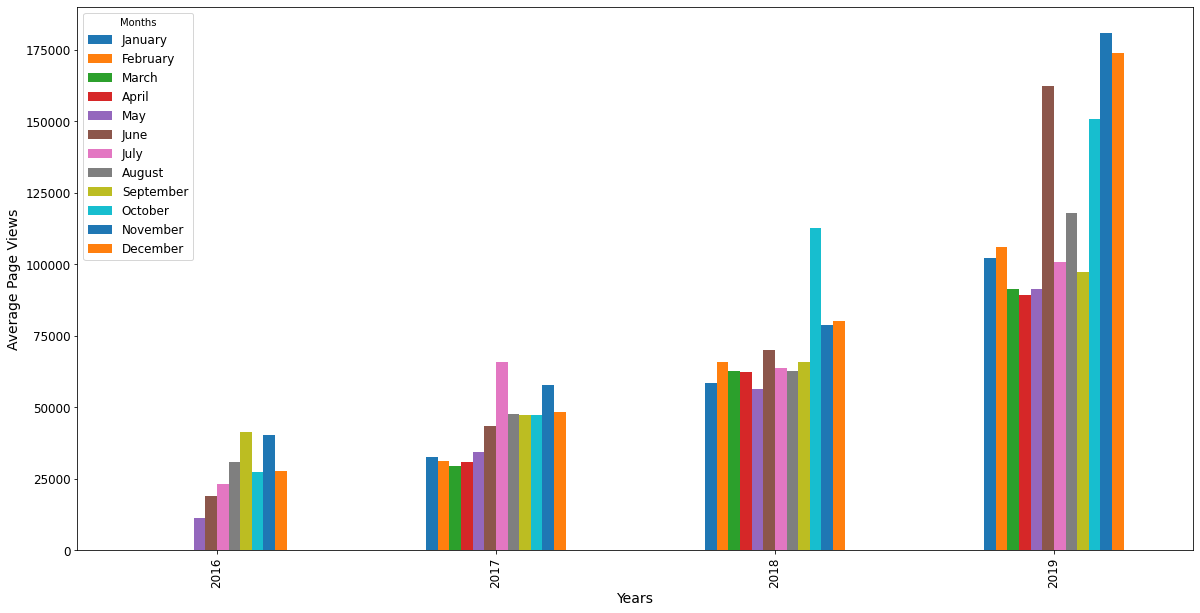

In [ ]:
# Draw bar plot
fig = df_barplot.plot(kind ="bar", legend = True, figsize = (20,10)).figure
plt.xlabel("Years", fontsize= 14)
plt.ylabel("Average Page Views", fontsize= 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()

In [ ]:
# Preparing data for box plots
boxplot = df.copy()
boxplot.reset_index(inplace=True)
boxplot['year'] = [date.year for date in boxplot["date"]]
boxplot['month'] = [date.strftime('%b') for date in boxplot["date"]] #strftime() function is used to convert date and time objects to their string representation

boxplot["month_num"] = boxplot["date"].dt.month
df_boxplot = boxplot.sort_values("month_num")

df_boxplot

,date,value,month,year,month_num
602,2018-01-01,41810,Jan,2018,1
239,2017-01-03,31525,Jan,2017,1
240,2017-01-04,28955,Jan,2017,1
241,2017-01-05,35024,Jan,2017,1
242,2017-01-06,37353,Jan,2017,1
...,...,...,...,...,...
599,2017-12-29,72819,Dec,2017,12
598,2017-12-28,51018,Dec,2017,12
597,2017-12-27,43075,Dec,2017,12
233,2016-12-28,28424,Dec,2016,12


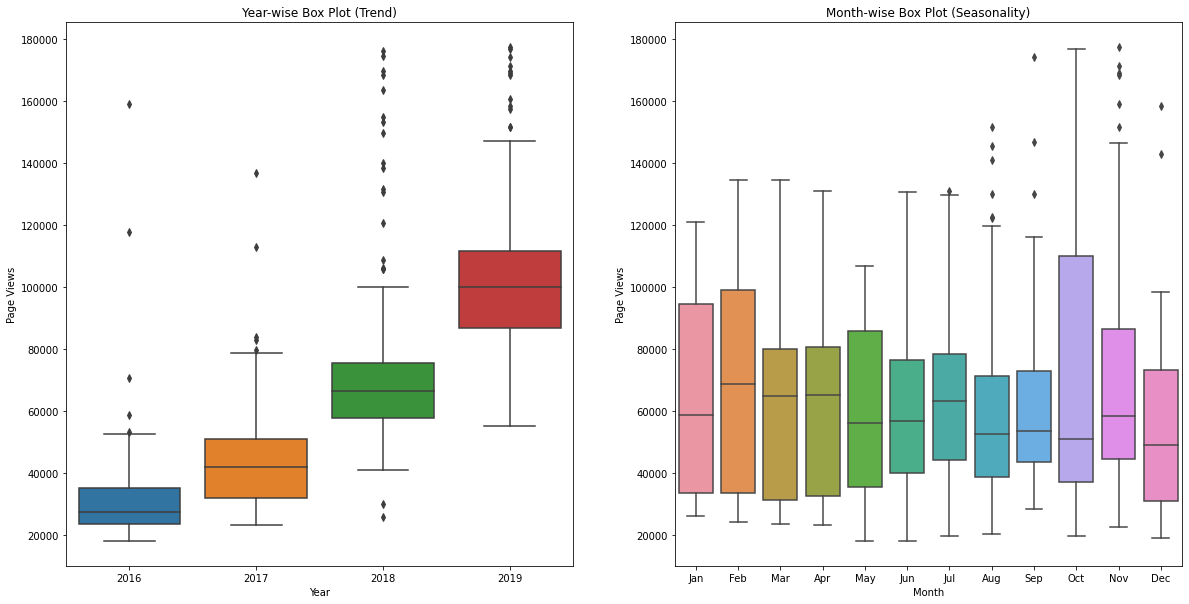

In [ ]:
#Box Plot following the instructions

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1 = sns.boxplot(x=df_boxplot["year"], y=df_boxplot["value"], ax=ax1)
ax1.set_title("Year-wise Box Plot (Trend)") 
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

ax2 = sns.boxplot(x=df_boxplot["month"], y=df_boxplot["value"], ax=ax2)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')

plt.show()